In [1]:
import os, shutil
original_dataset_dir='/home/xwen/work_uestc/xin_project/catsdogs/train'
base_dir='/home/xwen/work_uestc/xin_project/catsdogs/smallsets'
#os.mkdir(base_dir)
train_dir=os.path.join(base_dir,'train')
#os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
#os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
#os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
#os.mkdir(train_dogs_dir)
validation_cats_dir=os.path.join(validation_dir,'cats')
#os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
#os.mkdir(validation_dogs_dir)
test_cats_dir=os.path.join(test_dir,'cats')
#os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
#os.mkdir(test_dogs_dir)

fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [2]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break
    

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [5]:
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)
model.save('cats_and_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 42s 416ms/step - loss: 0.6891 - acc: 0.5450 - val_loss: 0.6679 - val_acc: 0.6050
Epoch 2/30
100/100 [==============================] - 41s 412ms/step - loss: 0.6577 - acc: 0.6020 - val_loss: 0.6464 - val_acc: 0.6120
Epoch 3/30
100/100 [==============================] - 40s 404ms/step - loss: 0.6159 - acc: 0.6625 - val_loss: 0.7777 - val_acc: 0.5510
Epoch 4/30
100/100 [==============================] - 40s 403ms/step - loss: 0.5769 - acc: 0.7000 - val_loss: 0.5960 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 40s 404ms/step - loss: 0.5409 - acc: 0.7280 - val_loss: 0.6015 - val_acc: 0.6670
Epoch 6/30
100/100 [==============================] - 41s 407ms/step - loss: 0.5152 - acc: 0.7495 - val_loss: 0.6547 - val_acc: 0.6480
Epoch 7/30
100/100 [==============================] - 41s 407ms/step - loss: 0.4850 - acc: 0.7590 - val_loss: 0.6177 - val_acc: 0.6870
Epoch 8/30
100/100 [==============================] - 4

In [6]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

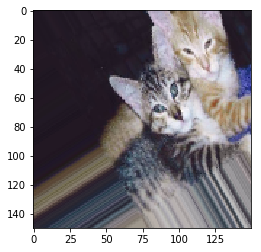

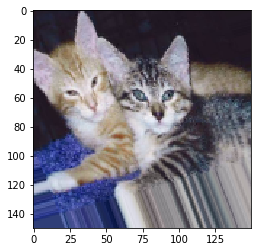

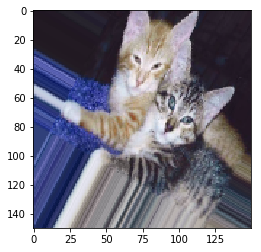

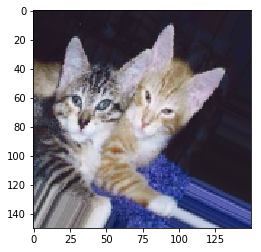

In [7]:
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
from keras.preprocessing import image 
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
    plt.show()

In [8]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode='binary')
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 62s 618ms/step - loss: 0.6927 - acc: 0.5138 - val_loss: 0.6868 - val_acc: 0.5490
Epoch 2/100
100/100 [==============================] - 59s 595ms/step - loss: 0.6875 - acc: 0.5531 - val_loss: 0.6649 - val_acc: 0.6030
Epoch 3/100
100/100 [==============================] - 58s 578ms/step - loss: 0.6712 - acc: 0.5809 - val_loss: 0.6691 - val_acc: 0.5740
Epoch 4/100
100/100 [==============================] - 59s 595ms/step - loss: 0.6536 - acc: 0.6034 - val_loss: 0.6205 - val_acc: 0.6520
Epoch 5/100
100/100 [==============================] - 59s 591ms/step - loss: 0.6419 - acc: 0.6300 - val_loss: 0.6427 - val_acc: 0.5950
Epoch 6/100
100/100 [==============================] - 60s 601ms/step - loss: 0.6176 - acc: 0.6647 - val_loss: 0.6698 - val_acc: 0.5920
Epoch 7/100
100/100 [==============================] - 60s 596ms/step - loss: 0.6144 - acc: 0.6659 - val_loss: 0.6253 - val_acc: 0.6460
Epoch 

100/100 [==============================] - 60s 598ms/step - loss: 0.4087 - acc: 0.8122 - val_loss: 0.4739 - val_acc: 0.8000
Epoch 61/100
100/100 [==============================] - 58s 583ms/step - loss: 0.3965 - acc: 0.8181 - val_loss: 0.5698 - val_acc: 0.7360
Epoch 62/100
100/100 [==============================] - 60s 596ms/step - loss: 0.4206 - acc: 0.8063 - val_loss: 0.4390 - val_acc: 0.8120
Epoch 63/100
100/100 [==============================] - 58s 578ms/step - loss: 0.3957 - acc: 0.8162 - val_loss: 0.4485 - val_acc: 0.7880
Epoch 64/100
100/100 [==============================] - 57s 568ms/step - loss: 0.4084 - acc: 0.8100 - val_loss: 0.4888 - val_acc: 0.7620
Epoch 65/100
100/100 [==============================] - 59s 592ms/step - loss: 0.4102 - acc: 0.8234 - val_loss: 0.4439 - val_acc: 0.8000
Epoch 66/100
100/100 [==============================] - 58s 583ms/step - loss: 0.4001 - acc: 0.8188 - val_loss: 0.4528 - val_acc: 0.8050
Epoch 67/100
100/100 [==============================] 

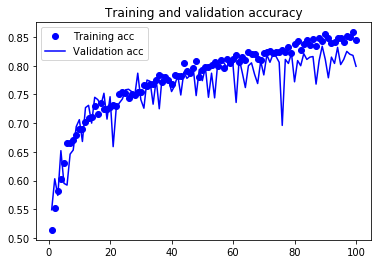

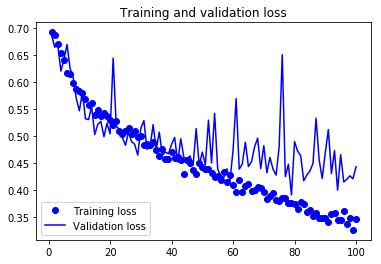

In [9]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [11]:
import os
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator

base_dir='/home/xwen/work_uestc/xin_project/catsdogs/smallsets'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20
def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(directory,target_size=(150,150),batch_size=batch_size,class_mode='binary')
    i=0
    for inputs_batch,labels_batch in generator:
        features_batch=conv_base.predict(inputs_batch)
        features[i*batch_size:(i+1)*batch_size]=features_batch
        labels[i*batch_size:(i+1)*batch_size]=labels_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels
train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
from keras import models
from keras import layers
from keras import optimizers

model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),loss='binary_crossentropy',metrics=['acc'])
history=model.fit(train_features,train_labels,epochs=30,batch_size=20,validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/step - loss: 0.5814 - acc: 0.6950 - val_loss: 0.4294 - val_acc: 0.8610
Epoch 2/30
2000/2000 [==============================] - 2s 979us/step - loss: 0.4198 - acc: 0.8065 - val_loss: 0.3573 - val_acc: 0.8610
Epoch 3/30
2000/2000 [==============================] - 2s 983us/step - loss: 0.3478 - acc: 0.8615 - val_loss: 0.3230 - val_acc: 0.8820
Epoch 4/30
2000/2000 [==============================] - 2s 981us/step - loss: 0.3100 - acc: 0.8725 - val_loss: 0.2988 - val_acc: 0.8820
Epoch 5/30
2000/2000 [==============================] - 2s 985us/step - loss: 0.2768 - acc: 0.8960 - val_loss: 0.2804 - val_acc: 0.8980
Epoch 6/30
2000/2000 [==============================] - 2s 983us/step - loss: 0.2605 - acc: 0.8980 - val_loss: 0.2779 - val_acc: 0.8820
Epoch 7/30
2000/2000 [==============================] - 2s 975us/step - loss: 0.2344 - acc: 0.9105 - val_loss: 0.2620 - val_acc: 0.9020
Ep

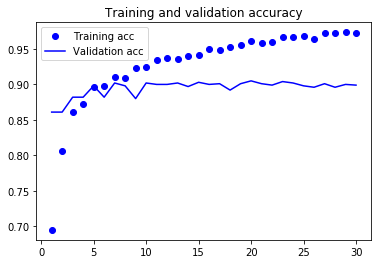

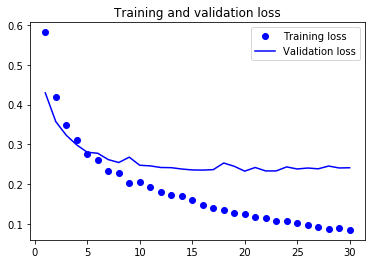

In [13]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=train_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 406s 4s/step - loss: 0.6735 - acc: 0.5970 - val_loss: 0.6494 - val_acc: 0.5980
Epoch 2/30
100/100 [==============================] - 405s 4s/step - loss: 0.5722 - acc: 0.7120 - val_loss: 0.4536 - val_acc: 0.7890
Epoch 3/30
100/100 [==============================] - 405s 4s/step - loss: 0.5234 - acc: 0.7540 - val_loss: 0.4777 - val_acc: 0.7620
Epoch 4/30
100/100 [==============================] - 405s 4s/step - loss: 0.4825 - acc: 0.7775 - val_loss: 0.4957 - val_acc: 0.7490
Epoch 5/30
100/100 [==============================] - 405s 4s/step - loss: 0.4335 - acc: 0.8090 - val_loss: 0.3451 - val_acc: 0.8440
Epoch 6/30
100/100 [==============================] - 405s 4s/step - loss: 0.4009 - acc: 0.8325 - val_loss: 0.4054 - val_acc: 0.8160
Epoch 7/30
100/100 [==============================] - 405s 4s/step - loss: 0.3976 - acc: 0.8380 - val_loss: 0.3503 - v

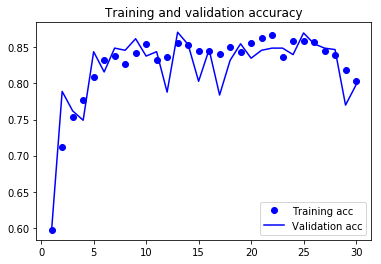

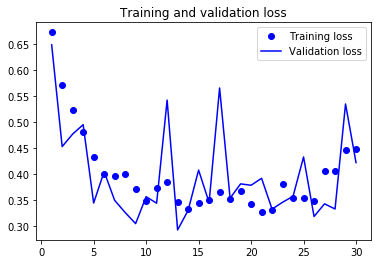

In [16]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [18]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 161s 2s/step - loss: 0.2709 - acc: 0.8875 - val_loss: 0.3157 - val_acc: 0.8780
Epoch 2/100
100/100 [==============================] - 160s 2s/step - loss: 0.2696 - acc: 0.8865 - val_loss: 0.3265 - val_acc: 0.8830
Epoch 3/100
100/100 [==============================] - 160s 2s/step - loss: 0.2387 - acc: 0.9000 - val_loss: 0.3006 - val_acc: 0.8720
Epoch 4/100
100/100 [==============================] - 160s 2s/step - loss: 0.2307 - acc: 0.8975 - val_loss: 0.5787 - val_acc: 0.8450
Epoch 5/100
100/100 [==============================] - 160s 2s/step - loss: 0.2343 - acc: 0.9075 - val_loss: 0.4791 - val_acc: 0.8590
Epoch 6/100
100/100 [==============================] - 160s 2s/step - loss: 0.2467 - acc: 0.8990 - val_loss: 0.3553 - val_acc: 0.8820
Epoch 7/100
100/100 [==============================] - 160s 2s/step - loss: 0.2118 - acc: 0.9115 - val_loss: 0.3050 - val_acc: 0.8910
Epoch 8/100
100/100 [==============================] - 159s 2s

Epoch 62/100
100/100 [==============================] - 160s 2s/step - loss: 0.2147 - acc: 0.9205 - val_loss: 0.3118 - val_acc: 0.9010
Epoch 63/100
100/100 [==============================] - 160s 2s/step - loss: 0.1801 - acc: 0.9325 - val_loss: 0.2990 - val_acc: 0.8840
Epoch 64/100
100/100 [==============================] - 160s 2s/step - loss: 0.1868 - acc: 0.9280 - val_loss: 0.3404 - val_acc: 0.9090
Epoch 65/100
100/100 [==============================] - 160s 2s/step - loss: 0.1895 - acc: 0.9305 - val_loss: 0.4116 - val_acc: 0.8850
Epoch 66/100
100/100 [==============================] - 160s 2s/step - loss: 0.1841 - acc: 0.9265 - val_loss: 0.3690 - val_acc: 0.8520
Epoch 67/100
100/100 [==============================] - 160s 2s/step - loss: 0.1876 - acc: 0.9260 - val_loss: 0.3245 - val_acc: 0.8870
Epoch 68/100
100/100 [==============================] - 160s 2s/step - loss: 0.1887 - acc: 0.9315 - val_loss: 0.3322 - val_acc: 0.9050
Epoch 69/100
100/100 [==============================] -

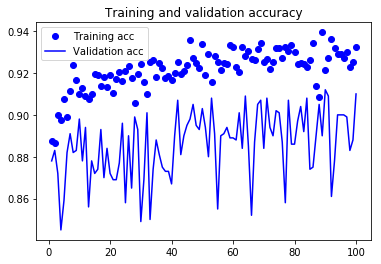

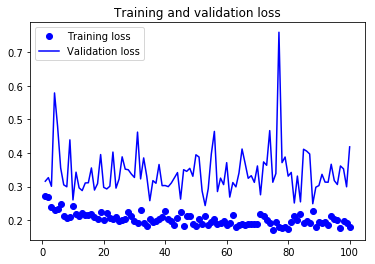

In [19]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_generator=test_datagen.flow_from_directory(test_dir,target_size=(150,150),batch_size=20,class_mode='binary')
print('begain')
test_loss,test_acc=model.evaluate_generator(test_generator,steps=50)
print('test acc:',test_acc)

Found 1000 images belonging to 2 classes.
begain
